In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [33]:
data=pd.read_csv("crime_data.csv")

# EDA and data visualization

In [34]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
data=data.rename({"Unnamed: 0" : "States"},axis=1)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [37]:
data.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [38]:
data=data.dropna()

In [39]:
data["States"].value_counts

<bound method IndexOpsMixin.value_counts of 0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45         

In [40]:
data.shape

(50, 5)

In [41]:
features=data.iloc[:,1:5]

In [42]:
features.head()


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [43]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)

# Evaluation

# silhouette

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
nc=range(2,11)
l=[]
for i in nc:
    
    HC_model=AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="complete")
    HC_model.fit_predict(scaled_features)
    l.append(silhouette_score(scaled_features,HC_model.fit_predict(scaled_features)))

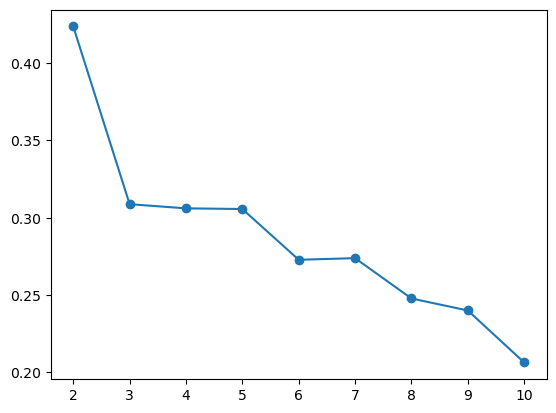

In [46]:
plt.scatter(nc,l)
plt.plot(nc,l)
plt.show()

# elbow 

In [47]:
nc=range(2,11)
l=[]
for i in nc:  
    KMeans_model=KMeans(n_clusters=i)
    KMeans_model.fit_predict(scaled_features)
    l.append(KMeans_model.inertia_)

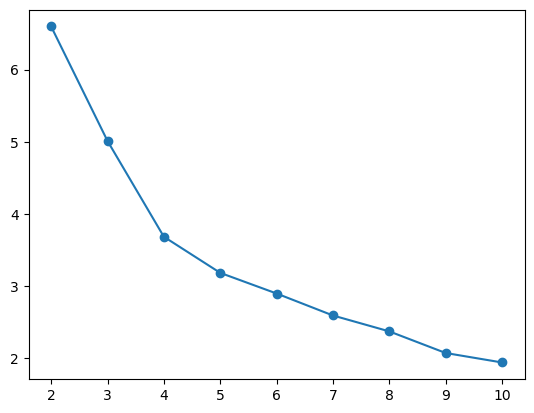

In [48]:
plt.scatter(nc,l)
plt.plot(nc,l)
plt.show()

In [49]:
l

[6.5968938679461955,
 5.010878493006417,
 3.683456153585913,
 3.1831577316766535,
 2.8971026271721647,
 2.5924855009704113,
 2.372060370163303,
 2.072710652903533,
 1.9414596952047882]

# kmeans based on elbow

In [50]:
KMeans_model=KMeans(n_clusters=4)
KMeans_model.fit_predict(scaled_features)

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [51]:
data["KMeans"]=KMeans_model.labels_

In [52]:
data.head()

,States,Murder,Assault,UrbanPop,Rape,KMeans
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


 # Hierarchical based on silhouette

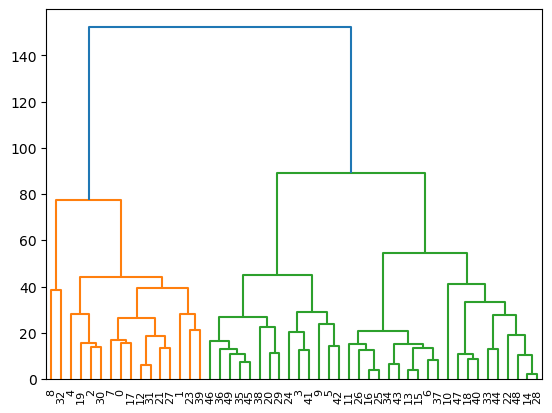

In [63]:
dendrogram=sch.dendrogram(sch.linkage(features,method="average"))

In [53]:
HC_model=AgglomerativeClustering(n_clusters=2,affinity="l2",linkage="complete")
HC_model.fit_predict(scaled_features)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
data["Hierarchical"] = HC_model.labels_ 

In [55]:
data.head()

,States,Murder,Assault,UrbanPop,Rape,KMeans,Hierarchical
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,3,1


# DBSCAN

In [56]:
DBSCAN=DBSCAN(eps=0.2, min_samples=3)
DBSCAN.fit_predict(scaled_features)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1,  0,  0, -1,  0, -1,  1, -1, -1,  0,
        0,  0,  2,  0, -1, -1,  0, -1, -1,  2, -1,  0,  2,  0,  0,  0],
      dtype=int64)

In [57]:
np.unique(DBSCAN.fit_predict(scaled_features))

array([-1,  0,  1,  2], dtype=int64)

In [58]:
data["DBSCAN"]=DBSCAN.labels_

In [59]:
data.head()

,States,Murder,Assault,UrbanPop,Rape,KMeans,Hierarchical,DBSCAN
0,Alabama,13.2,236,58,21.2,1,1,-1
1,Alaska,10.0,263,48,44.5,3,1,-1
2,Arizona,8.1,294,80,31.0,3,1,-1
3,Arkansas,8.8,190,50,19.5,1,0,-1
4,California,9.0,276,91,40.6,3,1,-1


In [60]:
data["DBSCAN"].value_counts()

-1    26
 0    18
 1     3
 2     3
Name: DBSCAN, dtype: int64